### 11/05/2023
# Clase de scrappeo con Martín Nadal

Vamos a hacer un scrapeo de la página de noticias [meneame](https://www.meneame.net).

In [5]:
#primero importamos requests
import requests

In [6]:
#cuando usamos requests pedimos la información no como usuario sino como ordenador
#vamos a pedir una request a google
r = requests.get('https://google.es')

In [7]:
r    # nos responde 200 porque todo ha ido bien

<Response [200]>

In [8]:
#ahora vamos a pedírselo a meneame
r = requests.get('https://www.meneame.net')

In [9]:
r     # aquí nos da error porque sabe que somos una máquina

<Response [403]>

In [10]:
#con request podemos falsear los datos de la consulta
#lo que hay que cambiar es el user agent, que es lo que hay que decirle
r = requests.get('https://www.meneame.net',
                 headers={'User-Agent':'Mozilla/5.0'}) # como un diccionario

In [11]:
#ahora menéame sí nos deja pasar
r

<Response [200]>

In [12]:
# esto lo que nos da es un texto largo
r.text

'<!DOCTYPE html>\n<html lang="es">\n<head>\n  <meta charset="UTF-8" />\n  <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0"/>\n\n  <title>\n                  Menéame - La portada de noticias elegida por los usuarios\n            </title>\n            <meta name="description" content="Menéame es tu lugar para informarte, donde las noticias de portada las eligen los usuarios">\n      \n  <link rel="canonical" href="/" />\n\n  \n    <link rel="stylesheet"\n          href="https://fonts.googleapis.com/css?family=Inter:100,200,400,500,600,700,900" />\n    <link rel="stylesheet" href="https://v2.mnmstatic.net/build/app.a31cf21f.css">\n              \n      <script src="https://v2.mnmstatic.net/build/runtime.8a378f4d.js" defer></script><script src="https://v2.mnmstatic.net/build/0.df45d704.js" defer></script><script src="https://v2.mnmstatic.net/build/1.a6b8303b.js" defer></script><script src="https://v2.mnmstatic.net/build/app.0fbb74f2.js" 

In [13]:
#para verlo necesitamos beautifulsoup
#interpreta la cadena de texto como si fuera un navegador
#así que lo importamos
from bs4 import BeautifulSoup

In [14]:
#añadimos el documento que queremos que nos interprete y le decimos que nos lo parsee
soup = BeautifulSoup(r.text,'html.parser')

Para analizar el contenido tenemos que ver cómo se distribuye la página con inspeccionar. Para eso, en la parte de inspeccionar, buscamos dentro de la página lo que queremos. En este caso, vemos que queremos los div de clase link, por lo que escribimos div.link.

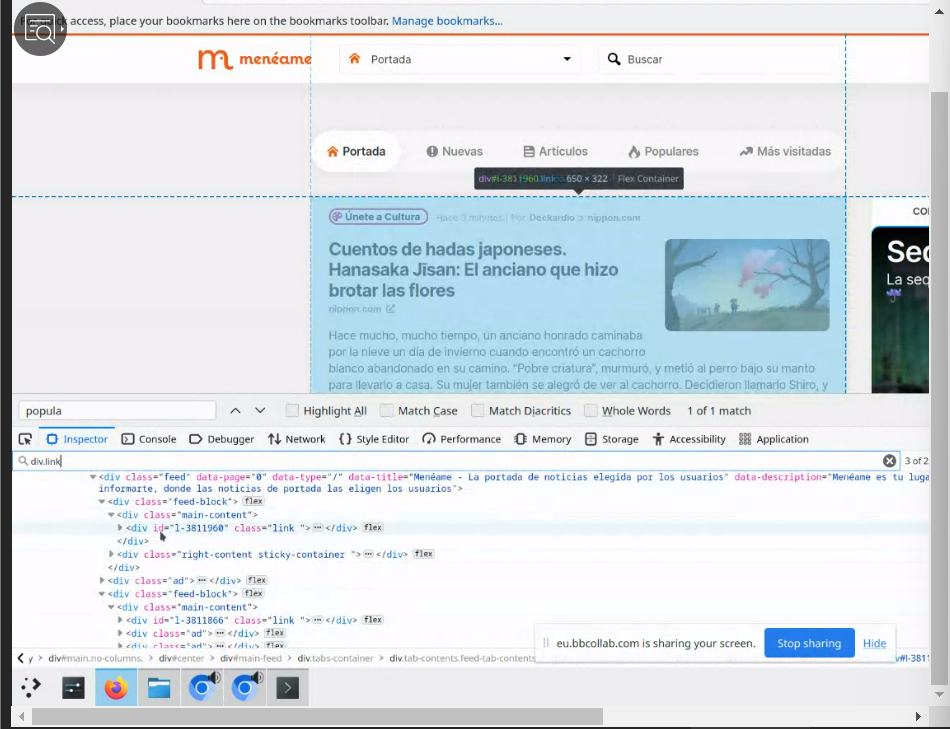

Así sacaríamos los bloques y luego nos quedaría sacar los titulares de cada uno de ellos.

In [15]:
#ahora los seleccionamos en lo que hemos procesado con BeautifulSoup
articulos = soup.select('div.link')

In [16]:
len(articulos) # ha encontrado 25 artículos

25

El elemento en el navegador es el mismo que tenemos parseado con beautiful soup y que es un h2.

In [17]:
articulos[0].select_one('h2').get_text()

'Una joven de 15 años da a luz sola y asesina a su bebé recién nacido mientras los padres estaban en casa'

In [18]:
#ahora iteramos por las distintas listas
for articulo in articulos:
    titular = articulo.select_one('h2').get_text()
    print(titular)

Una joven de 15 años da a luz sola y asesina a su bebé recién nacido mientras los padres estaban en casa
Luz verde para la nueva ley de inteligencia artificial de Europa: así te va a afectar
Identificado el autor de enterrar viva a una perra mastina en la provincia de León
Vaticinan más cáncer por una nueva mina en un pueblo de Guadalajara con 2 habitantes
Nadie recuerda a los veteranos que jugamos en equipos como el Esfínter de Milán, Steaua del Grifo o Nottingham Prisa
Ferreras reconoció que dio una información falsa que procedía de las cloacas de Interior. ¿No bastaba eso para que declarara en la comisión de las cloacas?
La sequía y la Virgen del Rocío
Detenidas 69 personas por bloquear con un 'bot' citas de extranjería y revenderlas
La Guardia Civil pide a los peatones que usen la acera y no invadan el carril bici... con una imagen de una calle por la que no se puede pasar
Etiquetados engañosos: los melones se vuelven españoles al cortarlos por la mitad
Seguridad Social elimina de 

In [19]:
#si queremos sacar el cuerpo, miramos sus características
#en este caso entidades tipo p con clase css linkpreview
articulos[0].select_one('p.link-preview').get_text()

'La joven asesinó al bebé porque no quería que nadie se enterara y lo tiró a la basura'

In [20]:
#ahora iteramos por las distintas listas
for articulo in articulos:
    cuerpo = articulo.select_one('p.link-preview').get_text()
    print(cuerpo)

La joven asesinó al bebé porque no quería que nadie se enterara y lo tiró a la basura
El borrador de propuesta de ley  ya ha obtenido el visto bueno por parte del Comité de Mercado Interior y el de Libertades Civiles, ahora tendrá que ser aprobado por el Parlamento y el Consejo. La inteligencia artificial ha dado pasos agigantados desde finales del año pasado, tanto que los principales reguladores han comenzado a preocuparse y a interesarse por fijar normas al respecto. Con este paso, la UE pretende aplicar nuevas normas de transparencia y gestión de riesgo para los modelos algorítmicos que usan esta tecnología.
El animal, que ahora se encuentra en buen estado, presentaba un fuerte golpe en la cabeza con la intención de causarle la muerte. El animal fue bautizado como 'Milagro' por haber dado un ejemplo de supervivencia al superar también una intervención posterior en una clínica veterinaria de Villablino.
Naharros es un pueblo que, según el INE, tiene apenas 2 vecinos. Ubicado a escas

Este texto aun así no nos sirve de mucho, así que lo metemos en csv. Se puede hacer mediante listas.

In [21]:
#ahora iteramos por las distintas listas
articulosParseados = []
for articulo in articulos:
    titular = articulo.select_one('h2').get_text()
    cuerpo = articulo.select_one('p.link-preview').get_text()
    
    articuloParseado = {'titular':titular,'cuerpo':cuerpo}
    articulosParseados.append(articuloParseado)
    #print(cuerpo)

In [22]:
articulosParseados

[{'titular': 'Una joven de 15 años da a luz sola y asesina a su bebé recién nacido mientras los padres estaban en casa',
  'cuerpo': 'La joven asesinó al bebé porque no quería que nadie se enterara y lo tiró a la basura'},
 {'titular': 'Luz verde para la nueva ley de inteligencia artificial de Europa: así te va a afectar',
  'cuerpo': 'El borrador de propuesta de ley  ya ha obtenido el visto bueno por parte del Comité de Mercado Interior y el de Libertades Civiles, ahora tendrá que ser aprobado por el Parlamento y el Consejo. La inteligencia artificial ha dado pasos agigantados desde finales del año pasado, tanto que los principales reguladores han comenzado a preocuparse y a interesarse por fijar normas al respecto. Con este paso, la UE pretende aplicar nuevas normas de transparencia y gestión de riesgo para los modelos algorítmicos que usan esta tecnología.'},
 {'titular': 'Identificado el autor de enterrar viva a una perra mastina en la provincia de León',
  'cuerpo': "El animal, qu

In [23]:
#ahora sí puedo convertirlo en csv
import numpy as np
import pandas as pd
df = pd.DataFrame(articulosParseados)
df

,titular,cuerpo
0,Una joven de 15 años da a luz sola y asesina a...,La joven asesinó al bebé porque no quería que ...
1,Luz verde para la nueva ley de inteligencia ar...,El borrador de propuesta de ley ya ha obtenid...
2,Identificado el autor de enterrar viva a una p...,"El animal, que ahora se encuentra en buen esta..."
3,Vaticinan más cáncer por una nueva mina en un ...,"Naharros es un pueblo que, según el INE, tiene..."
4,Nadie recuerda a los veteranos que jugamos en ...,«Para nosotros los que huimos del fútbol «de v...
5,Ferreras reconoció que dio una información fal...,Ferreras reconoció que dio una información fal...
6,La sequía y la Virgen del Rocío,Hace varios días leía una noticia que me impac...
7,Detenidas 69 personas por bloquear con un 'bot...,Los ciudadanos extranjeros se veían obligados ...
8,La Guardia Civil pide a los peatones que usen ...,Mal ejemplo el que ha utilizado la Guardia Civ...
9,Etiquetados engañosos: los melones se vuelven ...,Con la llegada de la nueva campaña de la fruta...


In [24]:
df.to_csv('articulosParseados.csv')

In [25]:
df.to_json('meneame.json')

### 12/05/2023
# Clase de scrappeo con Martín Nadal

Hoy continuamos con el scrappeo de datos.

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [27]:
# vamos a acceder al municipio de Zarzalejo
r = requests.get('http://elecciones.mir.es/resultadoslocales2019/#/es/mun/resultados/provincias/madrid/zarzalejo')

In [28]:
r  # nos deja acceder, nos da código 200

<Response [200]>

In [29]:
r.status_code

200

In [30]:
r.text[:200]

'<!DOCTYPE html>\n<html lang="es">\n\n<head>\n  <meta charset="utf-8" />\n  <title>Elecciones 2019</title>\n  <!-- TODO: Hay que ver si se pueden poner descriptions dinÃ¡micamente -->\n  <meta name="Descripti'

In [31]:
soup = BeautifulSoup(r.text,'html.parser')
soup.select('table')

[]

No nos deja porque es una página reactiva. Por lo tanto, lo que hacemos directamente es trabajar con los json.

In [32]:
# le damos la url del json
url = 'http://elecciones.mir.es/resultadoslocales2019//MUN2019/r/resultados/MUN2019/BKyQ8308R_SeQvuze-l-xQ.json'

In [33]:
# añadir el resto de los apuntes (...)

In [34]:
# vamos a hacer una función para que la url nos coja la info del uuid, que es el identificador de cada archivo json
def parseaMunicipio(uuid):
    url = 'http://elecciones.mir.es/resultadoslocales2019//MUN2019/r/resultados/MUN2019/' + uuid + '.json'
    print(url)

In [35]:
#ahora vamos a añadir líneas para que nos saque la tabla directamente
def parseaMunicipio(uuid):
    url = 'http://elecciones.mir.es/resultadoslocales2019//MUN2019/r/resultados/MUN2019/' + uuid + '.json'
    r = requests.get(url)
    resultados = r.json()
    poblacion = resultados['contexto']['nombre']
    candidaturas = resultados['convocatoriaActual']['candidaturas']
    votos = []
    for candidatura in candidaturas:
        votos.append(candidatura['votos']['total'])
    df = pd.DataFrame(candidaturas)
    df['votos'] = votos
    df['porcentaje'] = df['votos']/df['votos'].sum()*100
    df['poblacion'] = poblacion
    return df[['poblacion','siglas','siglasPadre','escaniosObtenidos','votos']]

In [36]:
#Y vamos a pillar todos los uuid de cada uno de los municipios
r = requests.get('http://elecciones.mir.es/resultadoslocales2019//geodata/MUN2019/PROV/madrid.json')

In [37]:
municipios = r.json()['hijos']  #vemos el texto que sacamos de la request como un diccionario

In [38]:
df = pd.DataFrame(municipios)  
df

,codigo,nombre,tipo,uuid,slug,slugPadre,hijos
0,28-001,"Acebeda, La",MUNI,Z6U_0EE6QKqIQTPfj9Edag,acebeda-la,madrid,NaN
1,28-002,Ajalvir,MUNI,vCPW-u1fSnmxyl9mrNn76g,ajalvir,madrid,NaN
2,28-003,Alameda del Valle,MUNI,FrvwCNzKTMK20PZvKXCSXg,alameda-del-valle,madrid,NaN
3,28-005,Alcalá de Henares,MUNI,iSoNNE67Rx2c0SKxe8jq2A,alcala-de-henares,madrid,NaN
4,28-006,Alcobendas,MUNI,Y17wZogfQ4y_kAiOJ0rEqg,alcobendas,madrid,NaN
...,...,...,...,...,...,...,...
174,28-180,Villarejo de Salvanés,MUNI,9c-B2o4ETC6U2gS5Gc7hOg,villarejo-de-salvanes,madrid,NaN
175,28-181,Villaviciosa de Odón,MUNI,ENVom_HNT82Jq8J66xPJYg,villaviciosa-de-odon,madrid,NaN
176,28-182,Villavieja del Lozoya,MUNI,7GtqBxucTzuSoSsN30EbBg,villavieja-del-lozoya,madrid,NaN
177,28-183,Zarzalejo,MUNI,SFcdbBBGQjiRuyUnCKETMQ,zarzalejo,madrid,NaN


In [39]:
uuids = df['uuid'] # ahora nos vamos a quedar con los uuids
uuids

0      Z6U_0EE6QKqIQTPfj9Edag
1      vCPW-u1fSnmxyl9mrNn76g
2      FrvwCNzKTMK20PZvKXCSXg
3      iSoNNE67Rx2c0SKxe8jq2A
4      Y17wZogfQ4y_kAiOJ0rEqg
                ...          
174    9c-B2o4ETC6U2gS5Gc7hOg
175    ENVom_HNT82Jq8J66xPJYg
176    7GtqBxucTzuSoSsN30EbBg
177    SFcdbBBGQjiRuyUnCKETMQ
178    rhvLH0BbRb2RAgDe3FOIrw
Name: uuid, Length: 179, dtype: object

In [40]:
for uuid in uuids:
    print(uuid)  #aquí estamos imprimiendo cada url por separado

Z6U_0EE6QKqIQTPfj9Edag
vCPW-u1fSnmxyl9mrNn76g
FrvwCNzKTMK20PZvKXCSXg
iSoNNE67Rx2c0SKxe8jq2A
Y17wZogfQ4y_kAiOJ0rEqg
BKyQ8308R_SeQvuze-l-xQ
5ZICcuJ4SxOi-j3WvGV3RQ
X5CgCgD1TPWTbil4XjYG8A
d_329B-0SGq6Rx6gJUxFxg
nYXolCYfQ-6IwHThglgNxA
JZxPHkg-SaCyxMsWnR_zrA
x4__mdllR0uWc3Fpin6U-w
-iUxC5WVSY-km2t-Hj8gJA
zIwzT711T_-v-_M2QS3yjg
SkxooCaJSHiDQO58nxqlkg
YnJObVdAS6CKWtodbMQYNQ
-bNm5hwyTa6CtJOgrjco9Q
-solpfUaRjKmADZQWFAeEQ
WGy6tOjIS6qS_TDo2ei3RA
GA3H215IRKa9ZF0PNCdi6w
qvosAaBeTByZ2zEif6AQxg
Yjl4OxzrTueUs5DnefC3TQ
5Yrgw40vSAiArD67b2S0-Q
EWP6LbnETom8KN_xVjoZhA
Jz0LAdcRRyS94zxfjv3PCw
TCac3gb-R6K9vG11wCyXsg
maNdy0yKQOOSqD5HY1kM3w
OpKRn-SsTKSdji71-T6KtQ
Zd2-2_GBR9-eMSqhPa5jdg
GSYM8wf_SyOMFBolUkZgrQ
-GSu_ZPnSnCrK6pmkafLOw
Jhw2KMStRUi3ZkF2yzIDIw
SaTp-nFZQ16B9jxK1YMGrw
j8UxDlIURAqw70mqS8S93Q
7s5qIgtmSEO65Q3MvazXzA
P2Lrxl-2TTiMbLPsopu_6Q
2Fh76RWlTFSsCwB2tjd52w
B-GWiCcnS1uDMe-ycnMz_g
xn29i7ApRxeDm8UOwmkqrw
r7QHbLwKTxWRF530q3oBhg
yf5xEDsKR7CPzHII4K1c1Q
xmeb5EivT-SzVol8QUNv4w
Nsvlrb_ZT0qNIRzp-QZI7g
mAcgT6RuTLO

In [41]:
# lo ideal es probar si nos podemos bajar datos de unos cuantos municipios
# así comprobamos si nos funciona antes de hacerlo con el total de archivos
resultadosElectorales = []
for uuid in uuids[:10]:
    print(uuid)  
    resultadoMunicipio = parseaMunicipio(uuid)
    resultadosElectorales.append(resultadoMunicipio)

Z6U_0EE6QKqIQTPfj9Edag
vCPW-u1fSnmxyl9mrNn76g
FrvwCNzKTMK20PZvKXCSXg
iSoNNE67Rx2c0SKxe8jq2A
Y17wZogfQ4y_kAiOJ0rEqg
BKyQ8308R_SeQvuze-l-xQ
5ZICcuJ4SxOi-j3WvGV3RQ
X5CgCgD1TPWTbil4XjYG8A
d_329B-0SGq6Rx6gJUxFxg
nYXolCYfQ-6IwHThglgNxA


In [42]:
parseaMunicipio(uuids[0]) # ahora podemos ver el resultado de cada municipio

,poblacion,siglas,siglasPadre,escaniosObtenidos,votos
0,"Acebeda, La",Cs,Cs,2,38
1,"Acebeda, La",PP,PP,1,32
2,"Acebeda, La",P.S.O.E.,PSOE,0,0


In [43]:
# Martín usa una librería que se llama tqdm para ver el progreso
from tqdm.notebook import tqdm

In [44]:
resultadosElectorales = []
for uuid in tqdm(uuids):
    # print(uuid) # podemos ver así cómo va el proceso o con tqdm  
    resultadoMunicipio = parseaMunicipio(uuid)
    resultadosElectorales.append(resultadoMunicipio)

  0%|          | 0/179 [00:00<?, ?it/s]

In [61]:
resultadosElectorales[150] # buscamos un municipio aleatorio

,poblacion,siglas,siglasPadre,escaniosObtenidos,votos
0,Valdeavero,P.S.O.E.,PSOE,7,515
1,Valdeavero,PP,PP,2,212
2,Valdeavero,C,C,0,19


In [70]:
resultadosElectorales = pd.concat(resultadosElectorales)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [68]:
totales = resultadosElectorales # cambiamos el nombre para que sea más corto
totales

,poblacion,siglas,siglasPadre,escaniosObtenidos,votos
0,"Acebeda, La",Cs,Cs,2,38
1,"Acebeda, La",PP,PP,1,32
2,"Acebeda, La",P.S.O.E.,PSOE,0,0
0,Ajalvir,PP,PP,4,726
1,Ajalvir,AIA,AIA,3,634
...,...,...,...,...,...
2,"Álamo, El",Cs,Cs,1,521
3,"Álamo, El",VOX,VOX,1,358
4,"Álamo, El",PODEMOS,PODEMOS,1,304
5,"Álamo, El",ACALA,ACALA,1,278


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

0    False
1     True
2    False
0     True
1    False
     ...  
2    False
3    False
4    False
5    False
6    False
Name: siglasPadre, Length: 1012, dtype: bool

TypeError: list indices must be integers or slices, not str